A01275180	Alexis Spinola Hernández

A01197399	Diana Paola Cadena Nito

A01705747	Enrique García Varela

A00831314	Paola Sofia Reyes Mancheno 

A01285041	María Fernanda Torres Alcubilla

## Librerías

In [1]:
!pip install tadasets

  Using cached tadasets-0.0.4-py3-none-any.whl (7.1 kB)



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install gudhi

     ---------------------------------------- 2.3/2.3 MB 1.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np
import plotly.graph_objects as go

# Parte 1

##### Generar una nube de puntos de la esfera en 3 dimensiones con centro (0,0,0) y radio 1, con ruido.

<Axes3DSubplot:>

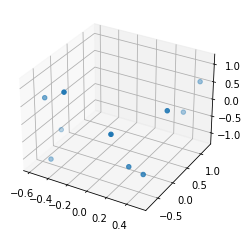

In [4]:
import tadasets 
t = tadasets.sphere(n=10, r=1, noise=0.2)
tadasets.plot3d(t)

##### Generar una función cuyo input es la nube de puntos y un radio R y el output es el nervio asociado a la cubierta de Cêch de radio R.

In [5]:
def nervio_Cech_R3(nube, radio):
  #Demostración gráfica de los radios
  centers = [(x,y,z) for x,y,z in nube]
  labels = [str(i) for i in range(len(nube))]
  nervio = []

  #ingresar todos los puntos dim 0 
  for l in labels:
    nervio.append(set([l]))

  #lista de comprensión para dim 1
  dim1 = [set([labels[i],labels[j]]) #par de puntos intersectados
  for i in range(len(centers)) for j in range(i+1,len(centers))
      #distancia entre los puntos es menor que su circunferencia
  if (math.sqrt((centers[j][0] - centers[i][0])**2 + (centers[j][1] - centers[i][1])**2 + (centers[j][2] - centers[i][2])**2) < 2*radio)] 

  for par in dim1: #Agregar al nervio la lista
    nervio.append(par)

  #lista de comprensión para dim 2
  dim2 = [dim1[i].union(dim1[j], dim1[k]) 
  for i in range(len(dim1)) for j in range(i+1, len(dim1)) for k in range(j+1, len(dim1))
  if len(dim1[i].union(dim1[j], dim1[k])) == 3] #la union de conjuntos de dim1 debe ser 3 elementos

  for par in dim2: #agregar al nervio la lista 
    nervio.append(par)


  #=========================Gráficar bolas===================================
  sphere_traces = []
  u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
  for i in range(len(centers)):
      x, y, z = centers[i]
      sphere_trace = go.Surface(
          x=x+radio*np.sin(u)*np.cos(v),
          y=y+radio*np.sin(u)*np.sin(v),
          z=z+radio*np.cos(u),
          opacity=0.8
      )
      sphere_traces.append(sphere_trace)

  fig = go.Figure(data=sphere_traces)
  fig.update_layout(scene=dict(
                      xaxis=dict(title='X'),
                      yaxis=dict(title='Y'),
                      zaxis=dict(title='Z')))
  fig.show()


  print('\n Nervio Asociado a cubierta de Cêch:')
  return nervio
nervio_Cech_R3(t, 0.4)


 Nervio Asociado a cubierta de Cêch:


[{'0'},
 {'1'},
 {'2'},
 {'3'},
 {'4'},
 {'5'},
 {'6'},
 {'7'},
 {'8'},
 {'9'},
 {'1', '8'},
 {'2', '4'},
 {'3', '6'},
 {'5', '9'}]

##### Generar una función cuyo input es la nube de puntos y un radio R, y el output es el nervio de Rips asociado al radio R.

In [6]:
# lo mismo que con Cêch pero en este caso distancia menor o igual a dos veces el radio

def nervio_Ribs_R3(nube, radio):
  #Demostración gráfica de los radios
  centers = [(x,y,z) for x,y,z in nube]
  labels = [str(i) for i in range(len(nube))]
  nervio = []

  #ingresar todos los puntos dim 0 
  for l in labels:
    nervio.append(set([l]))

  #lista de comprensión para dim 1
  dim1 = [set([labels[i],labels[j]]) #par de puntos intersectados
  for i in range(len(centers)) for j in range(i+1,len(centers))
      #distancia entre los puntos es menor o igual que su circunferencia
  if (math.sqrt((centers[j][0] - centers[i][0])**2 + (centers[j][1] - centers[i][1])**2 + (centers[j][2] - centers[i][2])**2) <= 2*radio)] 

  for par in dim1: #Agregar al nervio la lista
    nervio.append(par)

  #lista de comprensión para dim 2
  dim2 = [dim1[i].union(dim1[j], dim1[k]) 
  for i in range(len(dim1)) for j in range(i+1, len(dim1)) for k in range(j+1, len(dim1))
  if len(dim1[i].union(dim1[j], dim1[k])) == 3] #la union de conjuntos de dim1 debe ser 3 elementos

  for par in dim2: #agregar al nervio la lista 
    nervio.append(par)


  #=========================Gráficar bolas===================================
  sphere_traces = []
  u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
  for i in range(len(centers)):
      x, y, z = centers[i]
      sphere_trace = go.Surface(
          x=x+radio*np.sin(u)*np.cos(v),
          y=y+radio*np.sin(u)*np.sin(v),
          z=z+radio*np.cos(u),
          opacity=0.8
      )
      sphere_traces.append(sphere_trace)

  fig = go.Figure(data=sphere_traces)
  fig.update_layout(scene=dict(
                      xaxis=dict(title='X'),
                      yaxis=dict(title='Y'),
                      zaxis=dict(title='Z')))
  fig.show()

  print('\n Nervio Asociado a cubierta de Ribs:')
  return nervio
nervio_Ribs_R3(t, 0.4)


 Nervio Asociado a cubierta de Ribs:


[{'0'},
 {'1'},
 {'2'},
 {'3'},
 {'4'},
 {'5'},
 {'6'},
 {'7'},
 {'8'},
 {'9'},
 {'1', '8'},
 {'2', '4'},
 {'3', '6'},
 {'5', '9'}]

##### Hacer lo mismo para una nube de puntos de la circunferencia en el plano con centro (0,0) y radio 1, con ruido.

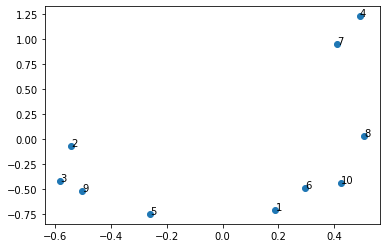

In [7]:
import matplotlib.pyplot as plt

# Define the data points and their corresponding labels
t_circulo = t[:,:2]
x = t_circulo[:,0]
y = t_circulo[:,1]
labels = [str(i+1) for i in range(len(t))]

# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(x, y)

# Add the labels for each data point
for i, label in enumerate(labels):
    ax.annotate(label, (x[i], y[i]))

# Display the plot
plt.show()

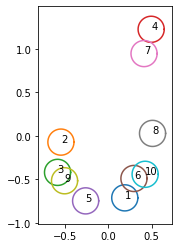


 Nervio Asociado a cubierta de Cêch:


[{'1'},
 {'2'},
 {'3'},
 {'4'},
 {'5'},
 {'6'},
 {'7'},
 {'8'},
 {'9'},
 {'10'},
 {'1', '6'},
 {'3', '9'},
 {'4', '7'},
 {'10', '6'}]

In [8]:
def nervio_Cech_R2(nube, radio):
  #Demostración gráfica de los radios
  centers = [(x,y) for x,y in nube[:,:2]]
  labels = [str(i+1) for i in range(len(nube))]
  nervio = []

  #ingresar todos los puntos dim 0 
  for l in labels:
    nervio.append(set([l]))

  #lista de comprensión para dim 1
  dim1 = [set([labels[i],labels[j]]) #par de puntos intersectados
  for i in range(len(centers)) for j in range(i+1,len(centers))
      #distancia entre los puntos es menor que su circunferencia
  if (math.sqrt((centers[j][0] - centers[i][0])**2 + (centers[j][1] - centers[i][1])**2) < 2*radio)] 

  for par in dim1: #Agregar al nervio la lista
    nervio.append(par)

  #lista de comprensión para dim 2
  dim2 = [dim1[i].union(dim1[j], dim1[k]) 
  for i in range(len(dim1)) for j in range(i+1, len(dim1)) for k in range(j+1, len(dim1))
  if len(dim1[i].union(dim1[j], dim1[k])) == 3] #la union de conjuntos de dim1 debe ser 3 elementos

  for par in dim2: #agregar al nervio la lista 
    nervio.append(par)

   #=========================Gráficar bolas===================================
  theta = np.linspace(0, 2*np.pi, 100)
  circ_x = [c[0] + radio*np.cos(theta) for c in centers]
  circ_y = [c[1] + radio*np.sin(theta) for c in centers]

  fig, ax = plt.subplots()
  for x, y in zip(circ_x, circ_y):
      ax.plot(x, y)
  ax.set_aspect('equal')
  fig.set_size_inches(4, 4)
  # Add the labels for each data point
  x = nube[:,0]
  y = nube[:,1]
  for i, label in enumerate(labels):
      ax.annotate(label, (x[i], y[i]))

  plt.show()


  print('\n Nervio Asociado a cubierta de Cêch:')
  return nervio
nervio_Cech_R2(t_circulo, 0.15)

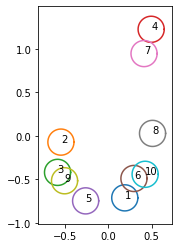


 Nervio Asociado a cubierta de Ribs:


[{'1'},
 {'2'},
 {'3'},
 {'4'},
 {'5'},
 {'6'},
 {'7'},
 {'8'},
 {'9'},
 {'10'},
 {'1', '6'},
 {'3', '9'},
 {'4', '7'},
 {'10', '6'}]

In [9]:
def nervio_Ribs_R2(nube, radio):
  #Demostración gráfica de los radios
  centers = [(x,y) for x,y in nube[:,:2]]
  labels = [str(i+1) for i in range(len(nube))]
  nervio = []

  #ingresar todos los puntos dim 0 
  for l in labels:
    nervio.append(set([l]))

  #lista de comprensión para dim 1
  dim1 = [set([labels[i],labels[j]]) #par de puntos intersectados
  for i in range(len(centers)) for j in range(i+1,len(centers))
      #distancia entre los puntos es menor o igual que su circunferencia
  if (math.sqrt((centers[j][0] - centers[i][0])**2 + (centers[j][1] - centers[i][1])**2) <= 2*radio)] 

  for par in dim1: #Agregar al nervio la lista
    nervio.append(par)

  #lista de comprensión para dim 2
  dim2 = [dim1[i].union(dim1[j], dim1[k]) 
  for i in range(len(dim1)) for j in range(i+1, len(dim1)) for k in range(j+1, len(dim1))
  if len(dim1[i].union(dim1[j], dim1[k])) == 3] #la union de conjuntos de dim1 debe ser 3 elementos

  for par in dim2: #agregar al nervio la lista 
    nervio.append(par)

   #=========================Gráficar bolas===================================
  theta = np.linspace(0, 2*np.pi, 100)
  circ_x = [c[0] + radio*np.cos(theta) for c in centers]
  circ_y = [c[1] + radio*np.sin(theta) for c in centers]

  fig, ax = plt.subplots()
  for x, y in zip(circ_x, circ_y):
      ax.plot(x, y)
  ax.set_aspect('equal')
  fig.set_size_inches(4, 4)
  # Add the labels for each data point
  x = nube[:,0]
  y = nube[:,1]
  for i, label in enumerate(labels):
      ax.annotate(label, (x[i], y[i]))

  plt.show()

  print('\n Nervio Asociado a cubierta de Ribs:')
  return nervio
nervio_Ribs_R2(t_circulo, 0.15)

#Parte 2

Explorar e instalar la librería gudhi: En particular las funciones Rips Complex  para generar el nervio de Rips y CoverComplex para el nervio de Cech

In [10]:
import gudhi

In [11]:
#Complejo de rips, se toman los datos generados en la esfera previamente y se crea el nervio de Rips
centers = [(x,y,z) for x,y,z in t]
rips_complex = gudhi.RipsComplex(points = centers,max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

fmt = '%s -> %.2f'
for ft_val in simplex_tree.get_filtration():
    print(fmt % tuple(ft_val))

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[5, 9] -> 0.20
[1, 8] -> 0.65
[3, 6] -> 0.79
[2, 4] -> 0.80
[0, 2] -> 0.84
[0, 7] -> 0.87
[5, 8] -> 0.92
[0, 4] -> 0.93
[0, 2, 4] -> 0.93
[1, 5] -> 0.94
[1, 5, 8] -> 0.94
[8, 9] -> 0.98
[5, 8, 9] -> 0.98
[0, 5] -> 1.03
[1, 9] -> 1.05
[1, 5, 9] -> 1.05
[1, 8, 9] -> 1.05
[2, 7] -> 1.19
[0, 2, 7] -> 1.19
[4, 7] -> 1.20
[0, 4, 7] -> 1.20
[2, 4, 7] -> 1.20
[3, 7] -> 1.20
[0, 9] -> 1.21
[0, 5, 9] -> 1.21
[1, 2] -> 1.21
[6, 7] -> 1.24
[3, 6, 7] -> 1.24
[0, 1] -> 1.39
[0, 1, 2] -> 1.39
[0, 1, 5] -> 1.39
[0, 1, 9] -> 1.39
[5, 7] -> 1.45
[0, 5, 7] -> 1.45
[2, 5] -> 1.47
[0, 2, 5] -> 1.47
[1, 2, 5] -> 1.47
[2, 5, 7] -> 1.47
[1, 6] -> 1.48
[5, 6] -> 1.53
[1, 5, 6] -> 1.53
[5, 6, 7] -> 1.53
[6, 9] -> 1.54
[1, 6, 9] -> 1.54
[5, 6, 9] -> 1.54
[7, 9] -> 1.56
[0, 7, 9] -> 1.56
[5, 7, 9] -> 1.56
[6, 7, 9] -> 1.56
[0, 8] -> 1.63
[0, 1, 8] -> 1.63
[0, 5, 8] -> 1.63
[0, 8, 9] -> 1.63
[2, 

In [12]:
#Para usar cover complex los puntos no pueden ser ingresados como el ejemplo anterior, se tiene que crear un archivo 
#.off que contenga los puntos y se grafican de la misma forma para crear el nervio de Cech 
#Los puntos fueron elegidos de forma arbitraria a manera de ejemplo
nerve_complex = gudhi.CoverComplex()
nerve_complex.set_verbose(True)
nerve_complex.read_point_cloud("cloud.off.txt")
nerve_complex.set_type('Nerve')
nerve_complex.set_color_from_coordinate(2)
nerve_complex.set_function_from_coordinate(2)
nerve_complex.set_graph_from_OFF()
nerve_complex.set_resolution_with_interval_number(10)
nerve_complex.set_gain(0.3)
nerve_complex.set_cover_from_function()
nerve_complex.find_simplices()
nerve_complex.write_info()
nerve_complex.create_simplex_tree()
nerve_complex.compute_PD()
fmt = '%s -> %.2f'
for ft_val in simplex_tree.get_filtration():
    print(fmt % ft_val)


    


[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[5, 9] -> 0.20
[1, 8] -> 0.65
[3, 6] -> 0.79
[2, 4] -> 0.80
[0, 2] -> 0.84
[0, 7] -> 0.87
[5, 8] -> 0.92
[0, 4] -> 0.93
[0, 2, 4] -> 0.93
[1, 5] -> 0.94
[1, 5, 8] -> 0.94
[8, 9] -> 0.98
[5, 8, 9] -> 0.98
[0, 5] -> 1.03
[1, 9] -> 1.05
[1, 5, 9] -> 1.05
[1, 8, 9] -> 1.05
[2, 7] -> 1.19
[0, 2, 7] -> 1.19
[4, 7] -> 1.20
[0, 4, 7] -> 1.20
[2, 4, 7] -> 1.20
[3, 7] -> 1.20
[0, 9] -> 1.21
[0, 5, 9] -> 1.21
[1, 2] -> 1.21
[6, 7] -> 1.24
[3, 6, 7] -> 1.24
[0, 1] -> 1.39
[0, 1, 2] -> 1.39
[0, 1, 5] -> 1.39
[0, 1, 9] -> 1.39
[5, 7] -> 1.45
[0, 5, 7] -> 1.45
[2, 5] -> 1.47
[0, 2, 5] -> 1.47
[1, 2, 5] -> 1.47
[2, 5, 7] -> 1.47
[1, 6] -> 1.48
[5, 6] -> 1.53
[1, 5, 6] -> 1.53
[5, 6, 7] -> 1.53
[6, 9] -> 1.54
[1, 6, 9] -> 1.54
[5, 6, 9] -> 1.54
[7, 9] -> 1.56
[0, 7, 9] -> 1.56
[5, 7, 9] -> 1.56
[6, 7, 9] -> 1.56
[0, 8] -> 1.63
[0, 1, 8] -> 1.63
[0, 5, 8] -> 1.63
[0, 8, 9] -> 1.63
[2, 

# Parte 3

Descargar los datos del reto y revisarlos: https://github.com/ClimateAI/TDA_ClimateAI

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import sklearn.ensemble
import scipy.stats
from sklearn.model_selection import train_test_split

## Importación de datos

In [14]:
#from google.colab import drive
#drive.mount('/content/drive')

In [15]:
datos=pd.read_pickle('datos_reto.pkl')
df=pd.DataFrame.from_dict(datos,orient='index')
df=df.transpose()
df=df.reindex(columns=['flow_dates','flow','obs_tas','obs_dates','obs_lon_lat','obs_pr'])

In [32]:
datos=pd.read_pickle('datos_reto.pkl')
df=pd.DataFrame.from_dict(datos,orient='index')
df=df.transpose()

In [16]:
df.head()

,flow_dates,flow,obs_tas,obs_dates,obs_lon_lat,obs_pr
0,1958-01-04,1.723781,"[-10.600000381469727, -9.699999809265137, -6.6...",1957-01-01,9.37,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000..."
1,1958-01-05,0.960882,"[-20.5, -19.100000381469727, -12.0, -17.700000...",1957-01-02,60.23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000..."
2,1958-01-06,0.001,"[-23.600000381469727, -22.5, -15.1000003814697...",1957-01-03,None,"[0.10000000149011612, 0.0, 0.30000001192092896..."
3,1958-01-07,0.001,"[-16.200000762939453, -16.0, -14.1000003814697...",1957-01-04,None,"[1.0, 0.0, 1.0, 1.100000023841858, 0.899999976..."
4,1958-01-08,0.316796,"[-7.900000095367432, -7.800000190734863, -9.5,...",1957-01-05,None,"[9.300000190734863, 8.600000381469727, 8.0, 8...."


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21546 entries, 0 to 21545
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   flow_dates   21542 non-null  datetime64[ns]
 1   flow         21542 non-null  object        
 2   obs_tas      21546 non-null  object        
 3   obs_dates    21546 non-null  datetime64[ns]
 4   obs_lon_lat  2 non-null      object        
 5   obs_pr       21546 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 1010.1+ KB


In [18]:
df1=df[['flow_dates','flow','obs_tas']]

In [19]:
df1

,flow_dates,flow,obs_tas
0,1958-01-04,1.723781,"[-10.600000381469727, -9.699999809265137, -6.6..."
1,1958-01-05,0.960882,"[-20.5, -19.100000381469727, -12.0, -17.700000..."
2,1958-01-06,0.001,"[-23.600000381469727, -22.5, -15.1000003814697..."
3,1958-01-07,0.001,"[-16.200000762939453, -16.0, -14.1000003814697..."
4,1958-01-08,0.316796,"[-7.900000095367432, -7.800000190734863, -9.5,..."
...,...,...,...
21541,2016-12-26,1.812796,"[-12.5, -11.699999809265137, -8.60000038146972..."
21542,NaT,None,"[-12.5, -11.899999618530273, -9.10000038146972..."
21543,NaT,None,"[-11.899999618530273, -11.399999618530273, -8...."
21544,NaT,None,"[-7.0, -6.5, -3.4000000953674316, -5.900000095..."


In [20]:
df2=df[['obs_dates','obs_pr']]
df2

,obs_dates,obs_pr
0,1957-01-01,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000..."
1,1957-01-02,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000..."
2,1957-01-03,"[0.10000000149011612, 0.0, 0.30000001192092896..."
3,1957-01-04,"[1.0, 0.0, 1.0, 1.100000023841858, 0.899999976..."
4,1957-01-05,"[9.300000190734863, 8.600000381469727, 8.0, 8...."
...,...,...
21541,2015-12-27,"[2.200000047683716, 0.10000000149011612, 1.100..."
21542,2015-12-28,"[5.5, 4.900000095367432, 8.300000190734863, 6...."
21543,2015-12-29,"[1.7999999523162842, 1.7000000476837158, 2.099..."
21544,2015-12-30,"[4.099999904632568, 3.5, 4.599999904632568, 5...."


,obs_tas,flow_dates,obs_lon_lat,obs_pr,obs_dates
0,"[-10.600000381469727, -9.699999809265137, -6.6...",1958-01-04,9.37,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000...",1957-01-01
1,"[-20.5, -19.100000381469727, -12.0, -17.700000...",1958-01-05,60.23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000...",1957-01-02
2,"[-23.600000381469727, -22.5, -15.1000003814697...",1958-01-06,None,"[0.10000000149011612, 0.0, 0.30000001192092896...",1957-01-03
3,"[-16.200000762939453, -16.0, -14.1000003814697...",1958-01-07,None,"[1.0, 0.0, 1.0, 1.100000023841858, 0.899999976...",1957-01-04
4,"[-7.900000095367432, -7.800000190734863, -9.5,...",1958-01-08,None,"[9.300000190734863, 8.600000381469727, 8.0, 8....",1957-01-05


<AxesSubplot:>

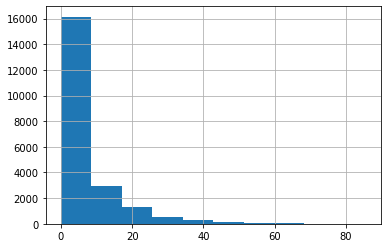

In [45]:
df['flow'].hist()

<AxesSubplot:>

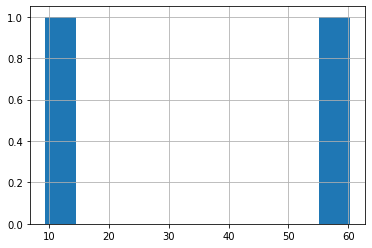

In [48]:
df['obs_lon_lat'].hist()	